In [2]:
import pandas as pd
import numpy as np

import networkx as nx

In [3]:
# read graph from the file
df = pd.read_csv('../data/soc-redditHyperlinks-body.tsv', sep='\t')

edges = df.values[:, 0:2]

In [4]:
# find unique nodes
nodes = np.unique(edges)

# create a graph
G = nx.MultiDiGraph()

# add nodes to the graph
G.add_nodes_from(nodes)

# add edges to the graph
G.add_edges_from(edges)

# find the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')

# find the degree distribution
degree_distribution = nx.degree_histogram(G)
print(f'Degree distribution: {degree_distribution}')
plot = nx.degree_histogram(G)

# find the average degree
average_degree = np.mean(list(dict(G.degree()).values()))
print(f'Average degree: {average_degree}')

# find the number of strongly connected components
num_strongly_connected_components = nx.number_strongly_connected_components(G)
print(f'Number of strongly connected components: {num_strongly_connected_components}')


Number of nodes: 35776
Number of edges: 286561
Degree distribution: [0, 15450, 5161, 2833, 1851, 1309, 1017, 758, 605, 452, 409, 350, 314, 293, 243, 222, 202, 174, 154, 155, 133, 117, 114, 130, 122, 98, 95, 77, 74, 73, 65, 72, 57, 56, 54, 44, 59, 46, 41, 53, 43, 37, 46, 57, 41, 48, 36, 35, 33, 29, 27, 31, 26, 35, 20, 24, 23, 26, 26, 25, 24, 25, 26, 27, 16, 23, 19, 17, 14, 19, 8, 13, 20, 19, 21, 14, 10, 13, 13, 11, 11, 17, 10, 23, 15, 13, 18, 21, 10, 14, 11, 19, 8, 9, 8, 10, 9, 17, 7, 13, 7, 11, 5, 9, 8, 7, 7, 9, 10, 11, 13, 6, 10, 5, 9, 4, 7, 9, 5, 7, 5, 6, 6, 7, 3, 11, 9, 2, 3, 6, 4, 9, 5, 3, 10, 5, 6, 6, 5, 3, 5, 2, 4, 0, 2, 7, 3, 6, 8, 3, 6, 4, 4, 7, 4, 1, 7, 3, 4, 5, 1, 2, 4, 4, 5, 6, 4, 5, 4, 4, 8, 6, 0, 4, 3, 3, 1, 4, 1, 2, 7, 5, 1, 2, 2, 3, 4, 2, 2, 3, 5, 2, 1, 4, 2, 1, 2, 4, 2, 3, 1, 3, 1, 1, 1, 3, 1, 0, 2, 1, 5, 3, 2, 0, 5, 4, 1, 3, 3, 4, 1, 2, 1, 2, 3, 4, 1, 1, 2, 3, 2, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 3, 1, 2, 1, 1, 4, 3, 1, 4, 4, 2, 1, 2, 2, 0, 1, 3, 2, 4, 0, 1, 3, 0, 0, 2, 0,

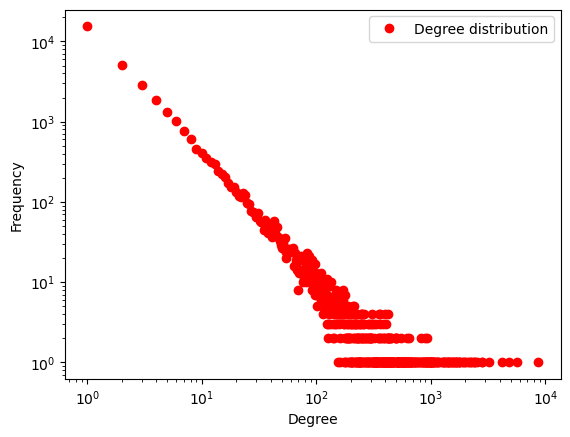

Plot is linear on the log-log scale, so the degrees obey power law


In [5]:
# Checking if degrees obey power law

import matplotlib.pyplot as plt
from scipy.stats import powerlaw

# get the degree distribution
degree_distribution = nx.degree_histogram(G)

# remove the first element
degree_distribution = degree_distribution[1:]

# get the x values
x = np.arange(1, len(degree_distribution) + 1)

# fit the power law

# plot the degree distribution
plt.plot(x, degree_distribution, 'ro', label='Degree distribution')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()
plt.show()

print("Plot is linear on the log-log scale, so the degrees obey power law")

In [6]:
# Printing the most important nodes
import operator

# find the degree centrality
degree_centrality = nx.degree_centrality(G)

# find the top 10 nodes with the highest degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse=True)

print('Top 20 nodes with the highest degree centrality:')
for i in range(20):
    print(f'{sorted_degree_centrality[i][0]}: {sorted_degree_centrality[i][1]}')
    
    
# find the closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# find the top 10 nodes with the highest closeness centrality
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse=True)

print('Top 10 nodes with the highest closeness centrality:')
for i in range(10):
    print(f'{sorted_closeness_centrality[i][0]}: {sorted_closeness_centrality[i][1]}')


Top 20 nodes with the highest degree centrality:
askreddit: 0.2422641509433962
subredditdrama: 0.15983228511530398
iama: 0.13626834381551362
writingprompts: 0.11731656184486372
leagueoflegends: 0.09112508735150245
outoftheloop: 0.07793151642208246
pics: 0.07779175401816911
circlebroke: 0.07080363382250174
videos: 0.06848357791754017
conspiracy: 0.06711390635918937
todayilearned: 0.0662753319357093
worldnews: 0.06331236897274632
nfl: 0.06247379454926624
buildapc: 0.060041928721174004
funny: 0.058728162124388535
explainlikeimfive: 0.056072676450034935
shitliberalssay: 0.05593291404612159
copypasta: 0.05305380852550664
techsupport: 0.052718378756114605
gaming: 0.049811320754716976
Top 10 nodes with the highest closeness centrality:
askreddit: 0.3139439724063652
iama: 0.30456464083406126
videos: 0.28783547898976797
pics: 0.28284101822714164
todayilearned: 0.2819160099096996
funny: 0.27542653057171446
worldnews: 0.27439665150176157
gaming: 0.2738030815094015
outoftheloop: 0.2721672331568039

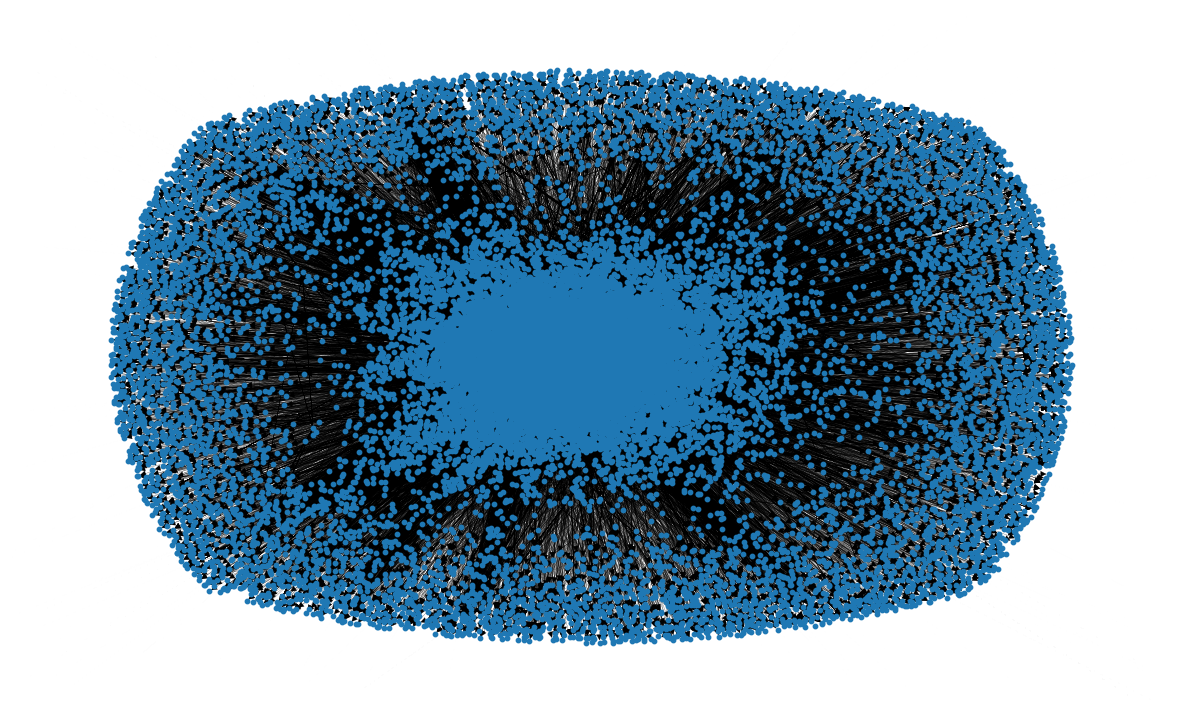

In [7]:
pos = nx.spring_layout(G, iterations=17, seed=123)
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)
plt.show()
plt.close()